In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve

In [6]:
df = pd.read_csv('Exam_Score_Prediction_Porject.csv')

In [7]:
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [8]:
df.tail(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19990,19992,24,female,b.tech,3.40,66.3,yes,8.8,poor,group study,high,easy,87.0
19991,19993,20,other,bca,2.94,90.3,yes,4.5,average,online videos,medium,moderate,56.7
19992,19994,17,male,b.com,5.74,81.4,yes,7.5,good,online videos,high,hard,95.0
19993,19995,19,female,ba,3.28,73.3,yes,9.5,good,group study,high,easy,93.9
19994,19996,22,other,diploma,3.04,80.7,yes,8.0,average,online videos,high,moderate,78.4
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       19790 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       19673 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [10]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,19790.000000,20000.000000,19673.000000,20000.000000
mean,10000.504600,20.473300,4.049281,70.017365,7.045270,62.513225
std,5773.654959,2.284458,2.284604,17.282262,1.722665,18.908491
min,1.000000,17.000000,0.090000,40.600000,4.100000,19.599000
25%,5000.750000,18.000000,2.060000,55.100000,5.600000,48.800000
50%,10000.500000,20.000000,4.080000,69.900000,7.100000,62.600000
75%,15000.250000,22.000000,6.020000,85.000000,8.600000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [11]:
df.isnull()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
missing = df.isnull().sum()

study_hours    210
sleep_hours    327
dtype: int64


In [16]:
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

study_hours    210
sleep_hours    327
dtype: int64


In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [23]:
for col in categorical_cols:
    if col!='student_id':
         print(f"\n{col}: {df[col].value_counts()}")


gender: gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

course: course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

internet_access: internet_access
yes    16988
no      3012
Name: count, dtype: int64

sleep_quality: sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

study_method: study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

facility_rating: facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

exam_difficulty: exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


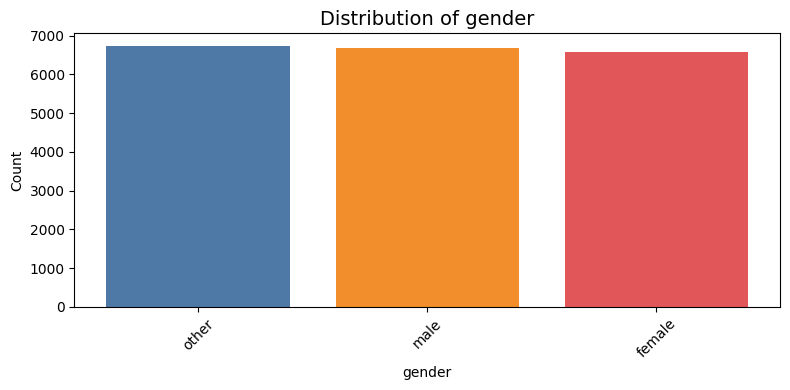

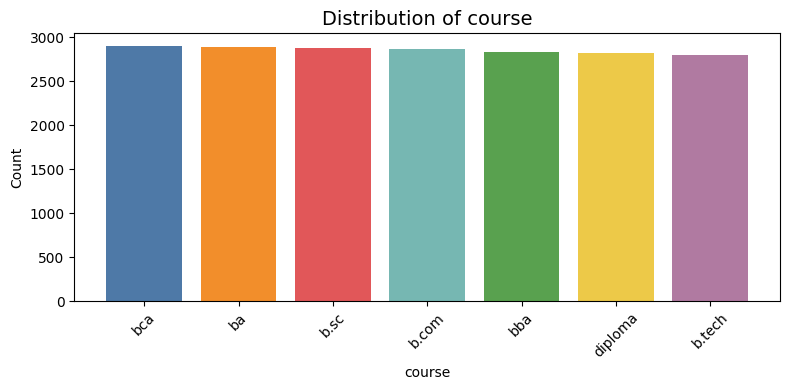

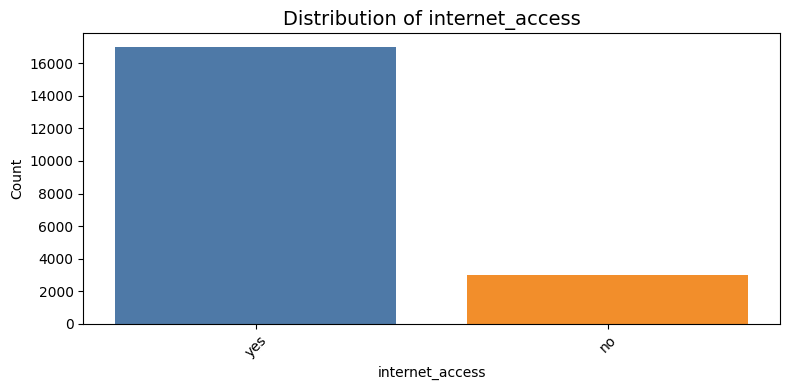

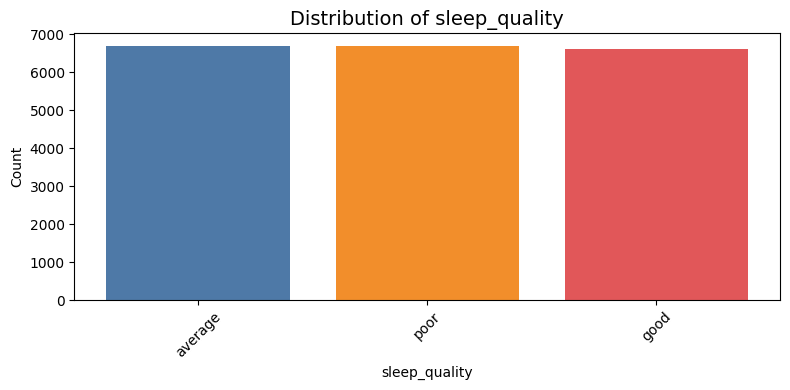

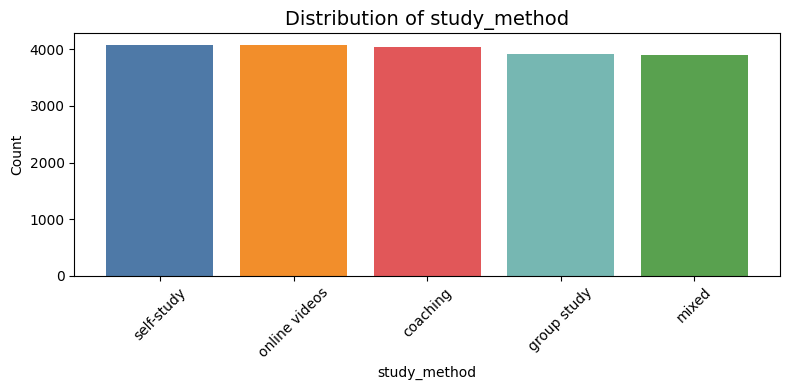

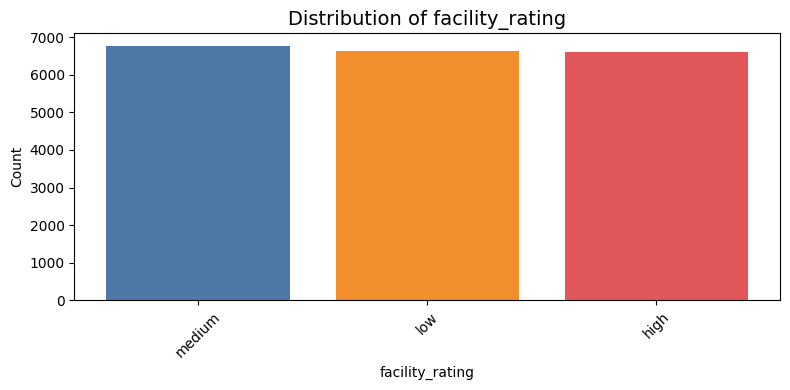

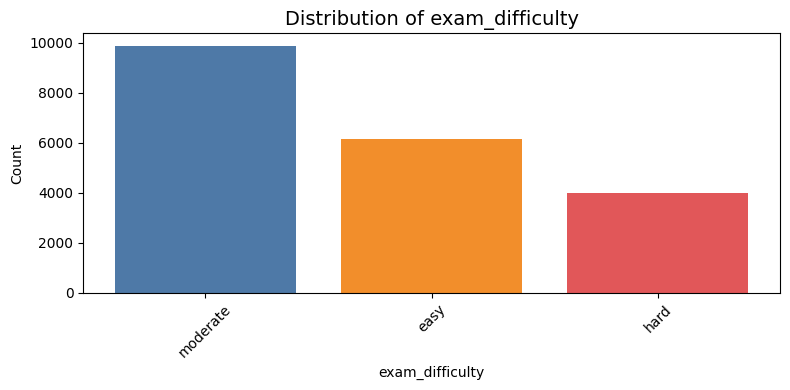

In [29]:
palette = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f',
           '#edc948', '#b07aa1', '#ff9da7', '#9c755f', '#bab0ab']
for col in categorical_cols:
    if col != 'student_id':
        counts = df[col].value_counts()
        plt.figure(figsize=(8,4))
        plt.bar(counts.index, counts.values, color=palette[:len(counts)])
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [30]:
df_processed = df.copy()

In [31]:
df_processed = df_processed.drop('student_id', axis=1)

In [32]:
df_processed

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [35]:
imputer = SimpleImputer(strategy='mean')
num_cols = ['study_hours', 'sleep_hours']

In [36]:
df[num_cols] = imputer.fit_transform(df[num_cols])

In [37]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [44]:
#Pass/Fail classification
df_processed['pass_fail'] = (df_processed['exam_score'] >= 50).astype(int)

In [45]:
df_processed

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,pass_fail
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,1
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,1
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,1
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,0
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5,1
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9,1
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5,1
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0,1


In [46]:
df_processed['pass_fail'].value_counts()

pass_fail
1    14596
0     5404
Name: count, dtype: int64

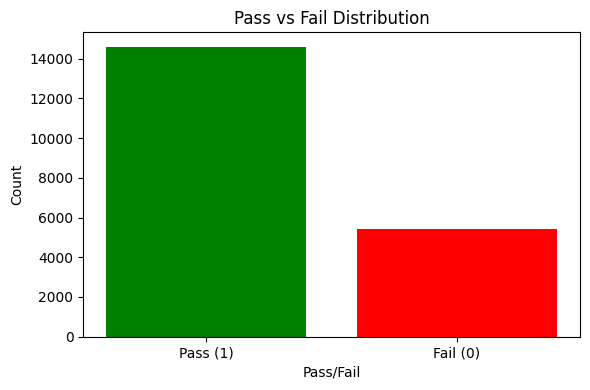

In [53]:
labels = ['Pass (1)', 'Fail (0)']
values = [14596, 5404]
colors = ['green', 'red']
plt.figure(figsize=(6,4))
plt.bar(labels, values,color=colors)
plt.title('Pass vs Fail Distribution')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [47]:
#Health Status
#writing a function to calculate health status
def calculate_health_status(row):
    score = 0
    if 7 <= row['sleep_hours'] <= 9:
        score += 3
    elif 6 <= row['sleep_hours'] < 7 or 9 < row['sleep_hours'] <= 10:
        score += 2
    else:
        score += 1
    
    if row['sleep_quality'] == 'good':
        score += 3
    elif row['sleep_quality'] == 'average':
        score += 2
    else:
        score += 1
 
    if 3 <= row['study_hours'] <= 6:
        score += 2
    elif row['study_hours'] < 3 or row['study_hours'] > 8:
        score += 1
    else:
        score += 1.5
    
    if 18 <= row['age'] <= 22:
        score += 1
    

    if score >= 7:
        return 'Excellent'
    elif score >= 5:
        return 'Good'
    elif score >= 3:
        return 'Fair'
    else:
        return 'Poor'

In [48]:
df_processed['health_status'] = df_processed.apply(calculate_health_status, axis=1)

In [49]:
df_processed

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,pass_fail,health_status
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,1,Good
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,1,Good
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,1,Good
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,0,Good
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5,1,Good
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9,1,Good
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5,1,Fair
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0,1,Excellent


In [51]:
df_processed['health_status'].value_counts()

health_status
Good         9968
Excellent    7400
Fair         2632
Name: count, dtype: int64

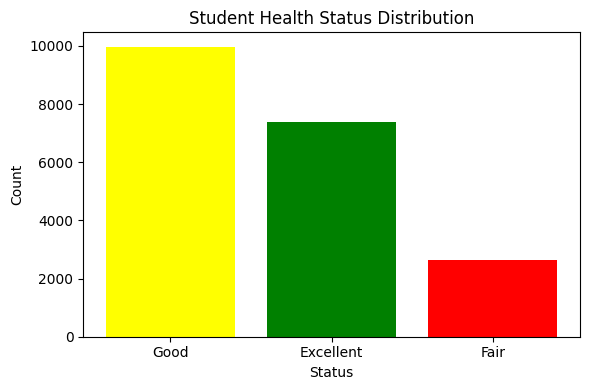

In [55]:
labels = ['Good', 'Excellent', 'Fair']
values = [9968, 7400, 2632]
colors = ['yellow','green','red'] 
plt.figure(figsize=(6,4))
plt.bar(labels, values, color=colors)
plt.title('Student Health Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [56]:
label_encoders = {}

In [57]:
categorical_features = ['gender', 'course', 'internet_access', 'sleep_quality', 
                       'study_method', 'facility_rating', 'exam_difficulty', 'health_status']

In [59]:
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"Encoded {col}")

Encoded gender
Encoded course
Encoded internet_access
Encoded sleep_quality
Encoded study_method
Encoded facility_rating
Encoded exam_difficulty
Encoded health_status


In [61]:
df_processed

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,...,pass_fail,health_status,gender_encoded,course_encoded,internet_access_encoded,sleep_quality_encoded,study_method_encoded,facility_rating_encoded,exam_difficulty_encoded,health_status_encoded
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,...,1,Good,1,6,1,2,0,1,1,2
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,...,1,Good,2,5,1,0,3,2,2,2
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,...,1,Good,1,1,1,2,0,0,2,2
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,...,0,Good,2,6,1,0,3,1,2,2
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,...,0,Good,0,6,1,2,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,...,1,Good,2,4,1,1,4,1,0,2
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,...,1,Good,1,0,0,0,0,2,2,2
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,...,1,Fair,2,6,1,2,1,1,0,1
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,...,1,Excellent,1,4,0,1,4,2,2,0


In [62]:
features_exam_score = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 
                       'study_method_encoded', 'facility_rating_encoded']

In [63]:
X_exam = df_processed[features_exam_score]
y_exam = df_processed['exam_score']

In [64]:
features_exam_score

['age',
 'study_hours',
 'class_attendance',
 'sleep_hours',
 'study_method_encoded',
 'facility_rating_encoded']

In [66]:
print(f"Target: exam_score (Range: {y_exam.min():.2f} - {y_exam.max():.2f})")

Target: exam_score (Range: 19.60 - 100.00)


In [67]:
X_pass = df_processed[['exam_score']]
y_pass = df_processed['pass_fail']

In [69]:
X_pass, y_pass

(       exam_score
 0            58.9
 1            54.8
 2            90.3
 3            29.7
 4            43.7
 ...           ...
 19995        86.5
 19996        60.9
 19997        64.5
 19998        79.0
 19999        71.0
 
 [20000 rows x 1 columns],
 0        1
 1        1
 2        1
 3        0
 4        0
         ..
 19995    1
 19996    1
 19997    1
 19998    1
 19999    1
 Name: pass_fail, Length: 20000, dtype: int64)

In [70]:
features_health = ['age', 'sleep_hours', 'sleep_quality_encoded', 'study_hours']

In [71]:
X_health = df_processed[features_health]
y_health = df_processed['health_status_encoded']

In [72]:
features_health

['age', 'sleep_hours', 'sleep_quality_encoded', 'study_hours']

In [106]:
# Exam Score Prediction
X_exam_train, X_exam_test, y_exam_train, y_exam_test = train_test_split(X_exam, y_exam, test_size=0.2, random_state=42)

In [75]:
# Pass/Fail Classification
X_pass_train, X_pass_test, y_pass_train, y_pass_test = train_test_split(X_pass, y_pass, test_size=0.2, random_state=42)

In [187]:
# Health Status Classification
X_health_train, X_health_test, y_health_train, y_health_test = train_test_split(X_health, y_health, test_size=0.2, random_state=42)

In [82]:
print(f"Exam Score: \nTrain={X_exam_train.shape[0]}, Test={X_exam_test.shape[0]}")
print(f"\nPass/Fail: \nTrain={X_pass_train.shape[0]}, Test={X_pass_test.shape[0]}")
print(f"\nHealth Status: \nTrain={X_health_train.shape[0]}, Test={X_health_test.shape[0]}")

Exam Score: 
Train=16000, Test=4000

Pass/Fail: 
Train=16000, Test=4000

Health Status: 
Train=16000, Test=4000


In [89]:
scaler_exam = StandardScaler()
X_exam_train_scaled = scaler_exam.fit_transform(X_exam_train)
X_exam_test_scaled = scaler_exam.transform(X_exam_test)

In [157]:
scaler_pass = StandardScaler()
X_pass_train_scaled = scaler_pass.fit_transform(X_pass_train)
X_pass_test_scaled = scaler_pass.transform(X_pass_test)

In [188]:
scaler_health = StandardScaler()
X_health_train_scaled = scaler_health.fit_transform(X_health_train)
X_health_test_scaled = scaler_health.transform(X_health_test)

In [92]:
regression_results = {}

In [103]:
lr_simple = LinearRegression()

In [108]:
imputer = SimpleImputer(strategy='mean')
X_exam_imputed = imputer.fit_transform(X_exam)

In [109]:
scaler = StandardScaler()
X_exam_scaled = scaler.fit_transform(X_exam_imputed)

In [110]:
X_exam_train_scaled, X_exam_test_scaled, y_exam_train, y_exam_test = train_test_split(
    X_exam_scaled, y_exam, test_size=0.2, random_state=42
)

In [111]:
lr_simple.fit(X_exam_train_scaled, y_exam_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
y_pred_lr_simple = lr_simple.predict(X_exam_test_scaled)

In [113]:
mae_lr = mean_absolute_error(y_exam_test, y_pred_lr_simple)
mse_lr = mean_squared_error(y_exam_test, y_pred_lr_simple)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_exam_test, y_pred_lr_simple)

In [114]:
regression_results['Linear Regression'] = {
        'MAE': mae_lr, 'MSE': mse_lr, 'RMSE': rmse_lr, 'R²': r2_lr
    }

In [115]:
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

MAE: 9.1091
MSE: 127.3631
RMSE: 11.2855
R²: 0.6439


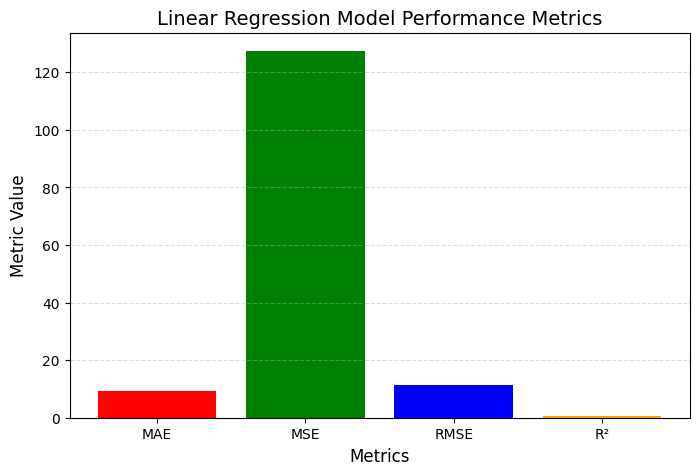

In [125]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_lr, mse_lr, rmse_lr, r2_lr]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Linear Regression Model Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [117]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [120]:
X_exam_train_poly = poly_features.fit_transform(X_exam_train_scaled)
X_exam_test_poly = poly_features.transform(X_exam_test_scaled)

In [121]:
lr_poly = LinearRegression()
lr_poly.fit(X_exam_train_poly, y_exam_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
y_pred_poly = lr_poly.predict(X_exam_test_poly)

In [138]:
mae_poly = mean_absolute_error(y_exam_test, y_pred_poly)
mse_poly = mean_squared_error(y_exam_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_exam_test, y_pred_poly)

In [139]:
regression_results['Polynomial Regression'] = {
        'MAE': mae_poly, 'MSE': mse_poly, 'RMSE': rmse_poly, 'R²': r2_poly
    }

In [124]:
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R²: {r2_poly:.4f}")

MAE: 8.7764
MSE: 118.3837
RMSE: 10.8804
R²: 0.6690


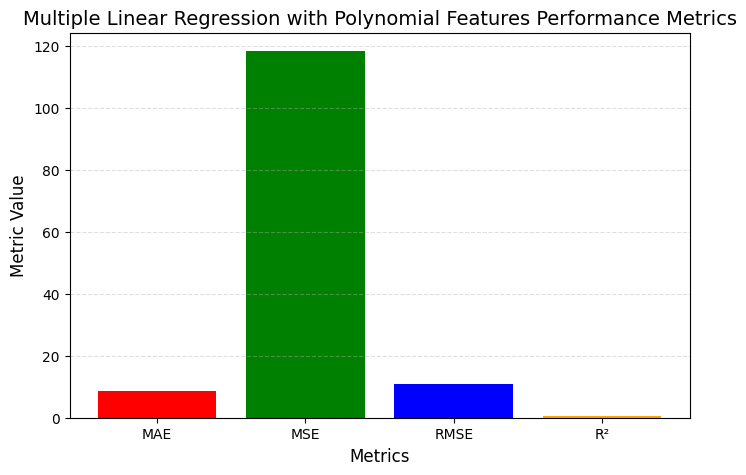

In [126]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_poly, mse_poly, rmse_poly, r2_poly]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Multiple Linear Regression with Polynomial Features Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [128]:
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=4, random_state=42)

In [129]:
dt_reg.fit(X_exam_train_scaled, y_exam_train)
y_pred_dt = dt_reg.predict(X_exam_test_scaled)

In [130]:
mae_dt = mean_absolute_error(y_exam_test, y_pred_dt)
mse_dt = mean_squared_error(y_exam_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_exam_test, y_pred_dt)

In [140]:
regression_results['Decision Tree'] = {
        'MAE': mae_dt, 'MSE': mse_dt, 'RMSE': rmse_dt, 'R²': r2_dt
    }

In [141]:
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R²: {r2_dt:.4f}")

MAE: 9.7592
MSE: 146.0075
RMSE: 12.0834
R²: 0.5918


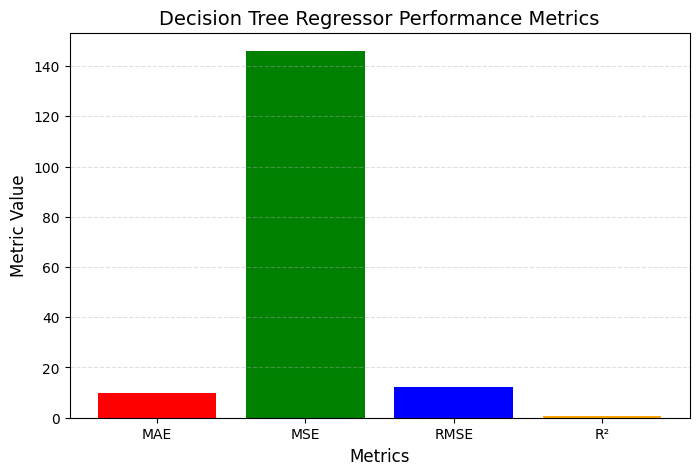

In [142]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_dt, mse_dt, rmse_dt, r2_dt]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Decision Tree Regressor Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [133]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)

In [134]:
rf_reg.fit(X_exam_train_scaled, y_exam_train)
y_pred_rf = rf_reg.predict(X_exam_test_scaled)

In [135]:
mae_rf = mean_absolute_error(y_exam_test, y_pred_rf)
mse_rf = mean_squared_error(y_exam_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_exam_test, y_pred_rf)

In [143]:
regression_results['Random Forest'] = {
        'MAE': mae_rf, 'MSE': mse_rf, 'RMSE': rmse_rf, 'R²': r2_rf
    }

In [136]:
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

MAE: 8.9117
MSE: 121.3986
RMSE: 11.0181
R²: 0.6606


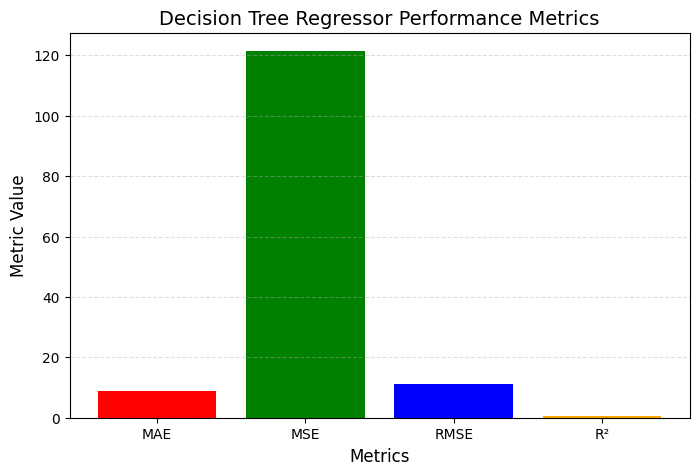

In [137]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_rf, mse_rf, rmse_rf, r2_rf]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Decision Tree Regressor Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [146]:
feature_importance = pd.DataFrame({
        'Feature': features_exam_score,
        'Importance': rf_reg.feature_importances_
    }).sort_values('Importance', ascending=False)

In [147]:
print(feature_importance.to_string(index=False))

                Feature  Importance
            study_hours    0.694073
       class_attendance    0.163909
            sleep_hours    0.051141
   study_method_encoded    0.044382
facility_rating_encoded    0.033239
                    age    0.013257


In [148]:
features = ['study_hours', 'class_attendance', 'sleep_hours', 
            'study_method_encoded', 'facility_rating_encoded', 'age']
importance = [0.694073, 0.163909, 0.051141, 0.044382, 0.033239, 0.013257]

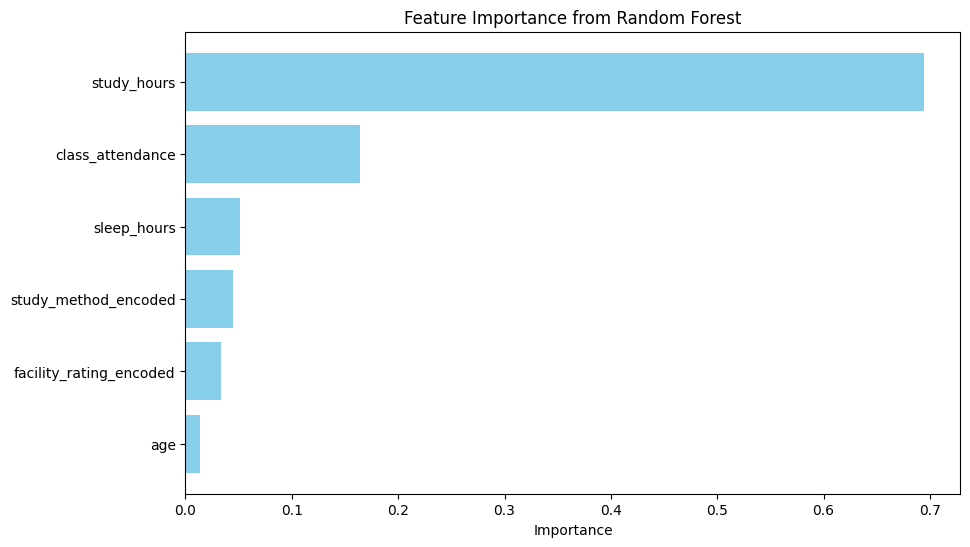

In [149]:
plt.figure(figsize=(10,6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [150]:
classification_pass_results = {}

In [158]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [159]:
log_reg.fit(X_pass_train_scaled, y_pass_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [160]:
y_pred_log = log_reg.predict(X_pass_test_scaled)
y_pred_log_proba = log_reg.predict_proba(X_pass_test_scaled)

In [176]:
acc_log = accuracy_score(y_pass_test, y_pred_log)
prec_log = precision_score(y_pass_test, y_pred_log, zero_division=0)
rec_log = recall_score(y_pass_test, y_pred_log, zero_division=0)
f1_log = f1_score(y_pass_test, y_pred_log, zero_division=0)
classification_pass_results['Logistic Regression'] = {
        'Accuracy': acc_log, 'Precision': prec_log, 'Recall': rec_log, 'F1': f1_log
    }

In [162]:
print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1: {f1_log:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


In [168]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_pass_scaled = scaler_pass.fit_transform(X_pass)

In [169]:
cv_accuracy = cross_val_score(log_reg, X_pass_scaled, y_pass, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(log_reg, X_pass_scaled, y_pass, cv=cv, scoring='precision', error_score='raise')
cv_recall = cross_val_score(log_reg, X_pass_scaled, y_pass, cv=cv, scoring='recall', error_score='raise')
cv_f1 = cross_val_score(log_reg, X_pass_scaled, y_pass, cv=cv, scoring='f1', error_score='raise')

In [170]:
print(f"Cross-validated Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Cross-validated Precision: {np.mean(cv_precision):.4f}")
print(f"Cross-validated Recall: {np.mean(cv_recall):.4f}")
print(f"Cross-validated F1: {np.mean(cv_f1):.4f}")

Cross-validated Accuracy: 1.0000
Cross-validated Precision: 1.0000
Cross-validated Recall: 1.0000
Cross-validated F1: 1.0000


In [172]:
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)

In [173]:
dt_clf.fit(X_pass_train_scaled, y_pass_train)
y_pred_dt_clf = dt_clf.predict(X_pass_test_scaled)

In [174]:
acc_dt_clf = accuracy_score(y_pass_test, y_pred_dt_clf)
prec_dt_clf = precision_score(y_pass_test, y_pred_dt_clf, zero_division=0)
rec_dt_clf = recall_score(y_pass_test, y_pred_dt_clf, zero_division=0)
f1_dt_clf = f1_score(y_pass_test, y_pred_dt_clf, zero_division=0)

In [175]:
print(f"Accuracy: {acc_dt_clf:.4f}")
print(f"Precision: {prec_dt_clf:.4f}")
print(f"Recall: {rec_dt_clf:.4f}")
print(f"F1: {f1_dt_clf:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


In [177]:
classification_pass_results['Decision Tree'] = {
        'Accuracy': acc_dt_clf, 'Precision': prec_dt_clf, 'Recall': rec_dt_clf, 'F1': f1_dt_clf
    }

In [179]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_pass_train_scaled, y_pass_train)
y_pred_rf_clf = rf_clf.predict(X_pass_test_scaled)

In [180]:
acc_rf_clf = accuracy_score(y_pass_test, y_pred_rf_clf)
prec_rf_clf = precision_score(y_pass_test, y_pred_rf_clf, zero_division=0)
rec_rf_clf = recall_score(y_pass_test, y_pred_rf_clf, zero_division=0)
f1_rf_clf = f1_score(y_pass_test, y_pred_rf_clf, zero_division=0)

In [181]:
classification_pass_results['Random Forest'] = {
        'Accuracy': acc_rf_clf, 'Precision': prec_rf_clf, 'Recall': rec_rf_clf, 'F1': f1_rf_clf
    }

In [182]:
print(f"Accuracy: {acc_rf_clf:.4f}")
print(f"Precision: {prec_rf_clf:.4f}")
print(f"Recall: {rec_rf_clf:.4f}")
print(f"F1: {f1_rf_clf:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


In [183]:
classification_health_results = {}

In [190]:
imputer = SimpleImputer(strategy='mean')
X_health_train_imputed = imputer.fit_transform(X_health_train)
X_health_test_imputed = imputer.transform(X_health_test)

In [191]:
scaler = StandardScaler()
X_health_train_scaled = scaler.fit_transform(X_health_train_imputed)
X_health_test_scaled = scaler.transform(X_health_test_imputed)

In [192]:
log_reg_health = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=1000)
log_reg_health.fit(X_health_train_scaled, y_health_train)
y_pred_log_health = log_reg_health.predict(X_health_test_scaled)

In [193]:
acc_log_health = accuracy_score(y_health_test, y_pred_log_health)
prec_log_health = precision_score(y_health_test, y_pred_log_health, average='weighted', zero_division=0)
rec_log_health = recall_score(y_health_test, y_pred_log_health, average='weighted', zero_division=0)
f1_log_health = f1_score(y_health_test, y_pred_log_health, average='weighted', zero_division=0)

In [194]:
print(f"Accuracy: {acc_log_health:.4f}")
print(f"Precision: {prec_log_health:.4f}")
print(f"Recall: {rec_log_health:.4f}")
print(f"F1: {f1_log_health:.4f}")

Accuracy: 0.6085
Precision: 0.6241
Recall: 0.6085
F1: 0.6033


In [195]:
classification_health_results['Logistic Regression'] = {
        'Accuracy': acc_log_health, 'Precision': prec_log_health, 'Recall': rec_log_health, 'F1': f1_log_health
    }

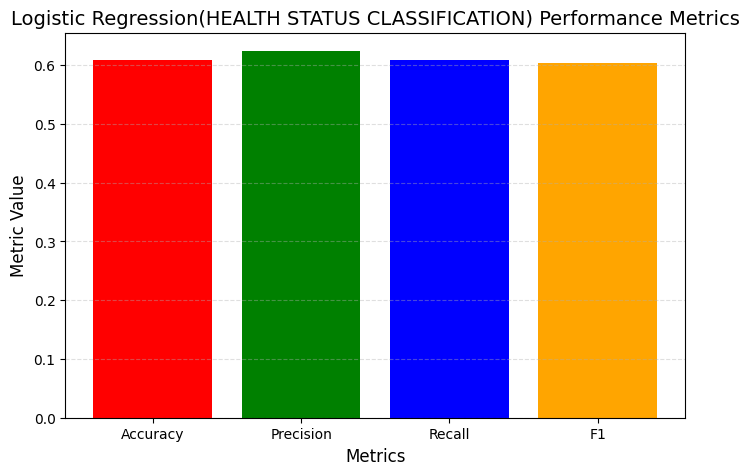

In [196]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [acc_log_health, prec_log_health, rec_log_health, f1_log_health]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Logistic Regression(HEALTH STATUS CLASSIFICATION) Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [197]:
knn_health = KNeighborsClassifier(n_neighbors=3)
knn_health.fit(X_health_train_scaled, y_health_train)
y_pred_knn_health = knn_health.predict(X_health_test_scaled)

In [198]:
acc_knn_health = accuracy_score(y_health_test, y_pred_knn_health)
prec_knn_health = precision_score(y_health_test, y_pred_knn_health, average='weighted', zero_division=0)
rec_knn_health = recall_score(y_health_test, y_pred_knn_health, average='weighted', zero_division=0)
f1_knn_health = f1_score(y_health_test, y_pred_knn_health, average='weighted', zero_division=0)

In [199]:
classification_health_results['K-Nearest Neighbors'] = {
        'Accuracy': acc_knn_health, 'Precision': prec_knn_health, 'Recall': rec_knn_health, 'F1': f1_knn_health
    }

In [200]:
print(f"Accuracy: {acc_knn_health:.4f}")
print(f"Precision: {prec_knn_health:.4f}")
print(f"Recall: {rec_knn_health:.4f}")
print(f"F1: {f1_knn_health:.4f}")

Accuracy: 0.9575
Precision: 0.9576
Recall: 0.9575
F1: 0.9574


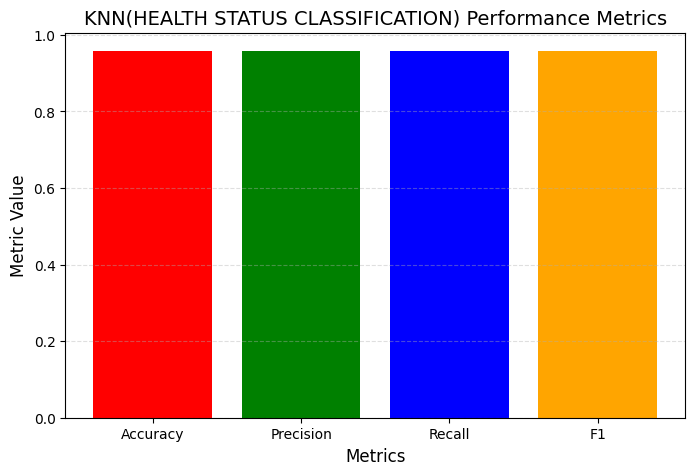

In [201]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [acc_knn_health, prec_knn_health, rec_knn_health, f1_knn_health]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("KNN(HEALTH STATUS CLASSIFICATION) Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [208]:
nb_health = GaussianNB()
nb_health.fit(X_health_train_scaled, y_health_train)
y_pred_nb_health = nb_health.predict(X_health_test_scaled)

In [209]:
acc_nb_health = accuracy_score(y_health_test, y_pred_nb_health)
prec_nb_health = precision_score(y_health_test, y_pred_nb_health, average='weighted', zero_division=0)
rec_nb_health = recall_score(y_health_test, y_pred_nb_health, average='weighted', zero_division=0)
f1_nb_health = f1_score(y_health_test, y_pred_nb_health, average='weighted', zero_division=0)

In [210]:
classification_health_results['Naive Bayes'] = {
        'Accuracy': acc_nb_health, 'Precision': prec_nb_health, 'Recall': rec_nb_health, 'F1': f1_nb_health
    }

In [211]:
print(f"Accuracy: {acc_nb_health:.4f}")
print(f"Precision: {prec_nb_health:.4f}")
print(f"Recall: {rec_nb_health:.4f}")
print(f"F1: {f1_nb_health:.4f}")

Accuracy: 0.7400
Precision: 0.7718
Recall: 0.7400
F1: 0.7285


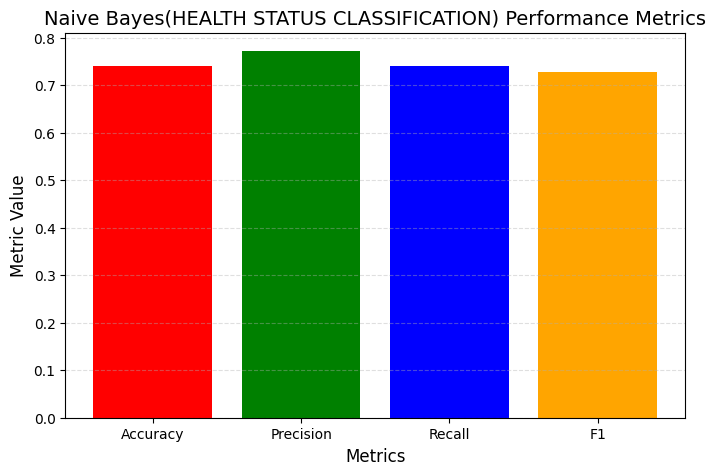

In [213]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [acc_nb_health, prec_nb_health, rec_nb_health, f1_nb_health]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Naive Bayes(HEALTH STATUS CLASSIFICATION) Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [215]:
rf_health = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_health.fit(X_health_train_scaled, y_health_train)
y_pred_rf_health = rf_health.predict(X_health_test_scaled)

In [216]:
acc_rf_health = accuracy_score(y_health_test, y_pred_rf_health)
prec_rf_health = precision_score(y_health_test, y_pred_rf_health, average='weighted', zero_division=0)
rec_rf_health = recall_score(y_health_test, y_pred_rf_health, average='weighted', zero_division=0)
f1_rf_health = f1_score(y_health_test, y_pred_rf_health, average='weighted', zero_division=0)

In [217]:
classification_health_results['Random Forest'] = {
        'Accuracy': acc_rf_health, 'Precision': prec_rf_health, 'Recall': rec_rf_health, 'F1': f1_rf_health
    }

In [218]:
print(f"Accuracy: {acc_rf_health:.4f}")
print(f"Precision: {prec_rf_health:.4f}")
print(f"Recall: {rec_rf_health:.4f}")
print(f"F1: {f1_rf_health:.4f}")

Accuracy: 0.9940
Precision: 0.9940
Recall: 0.9940
F1: 0.9940


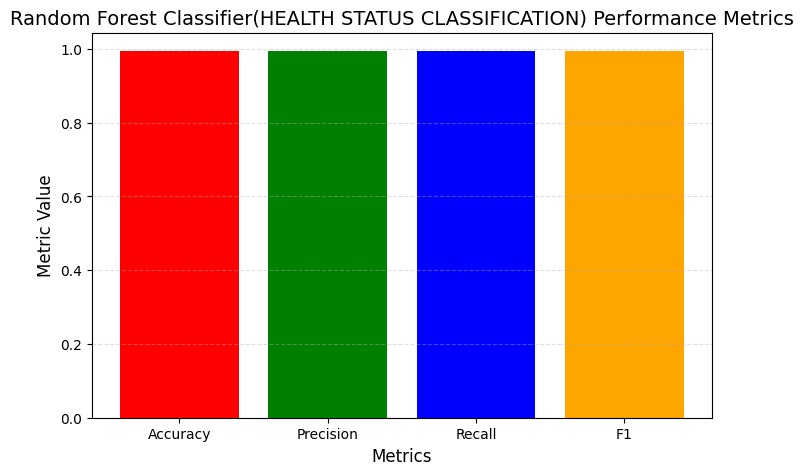

In [219]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [acc_rf_health, prec_rf_health, rec_rf_health, f1_rf_health]
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=colors)
plt.title("Random Forest Classifier(HEALTH STATUS CLASSIFICATION) Performance Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [220]:
fig = plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

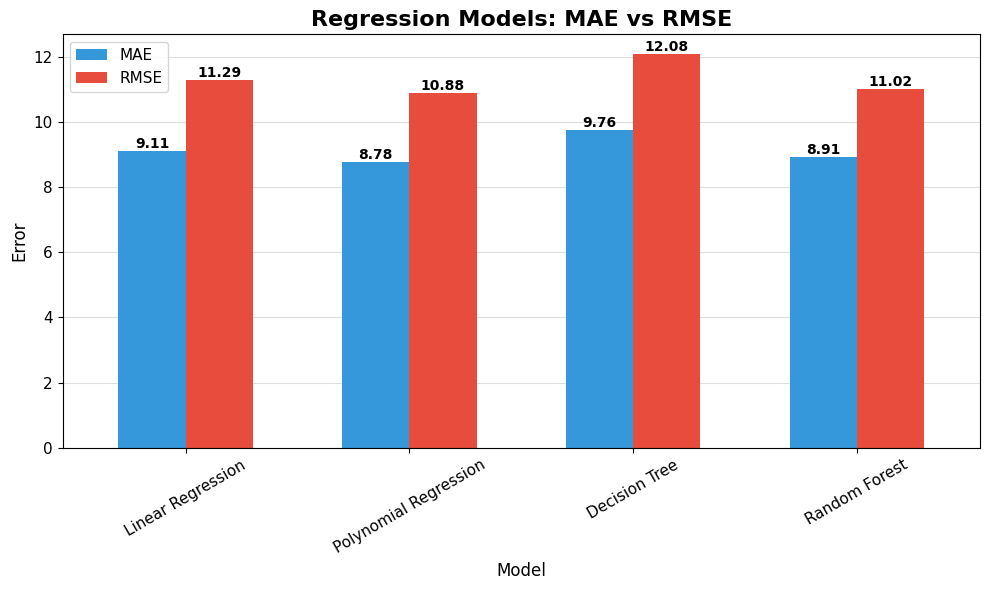

In [224]:
metrics_df = pd.DataFrame(regression_results).T 
metrics_df = metrics_df[['MAE', 'RMSE']]
fig, ax1 = plt.subplots(figsize=(10,6))
bars = metrics_df.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'], width=0.6)
ax1.set_title('Regression Models: MAE vs RMSE', fontsize=16, fontweight='bold')
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Error', fontsize=12)
ax1.tick_params(axis='x', rotation=30, labelsize=11)
ax1.tick_params(axis='y', labelsize=11)
ax1.legend(['MAE', 'RMSE'], fontsize=11)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold', rotation=0)
ax1.grid(axis='y', alpha=0.4)
ax1.set_axisbelow(True)
plt.tight_layout()
plt.show()

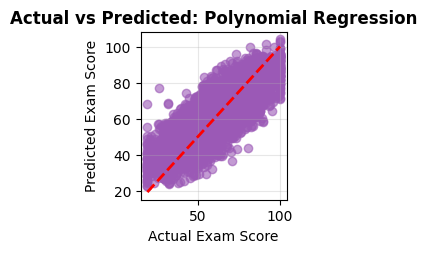

In [243]:
ax3 = plt.subplot(2, 3, 3)
best_reg_model = max(regression_results.items(), key=lambda x: x[1]['R²'])
if best_reg_model[0] == 'Random Forest':
    y_pred_best = y_pred_rf
elif best_reg_model[0] == 'Polynomial Regression':
    y_pred_best = y_pred_poly
elif best_reg_model[0] == 'Decision Tree':
    y_pred_best = y_pred_dt
else:
    y_pred_best = y_pred_lr_simple

ax3.scatter(y_exam_test, y_pred_best, alpha=0.6, color='#9b59b6')
ax3.plot([y_exam_test.min(), y_exam_test.max()], 
         [y_exam_test.min(), y_exam_test.max()], 'r--', lw=2)
ax3.set_title(f'Actual vs Predicted: {best_reg_model[0]}', fontsize=12, fontweight='bold')
ax3.set_xlabel('Actual Exam Score')
ax3.set_ylabel('Predicted Exam Score')
ax3.grid(alpha=0.3)

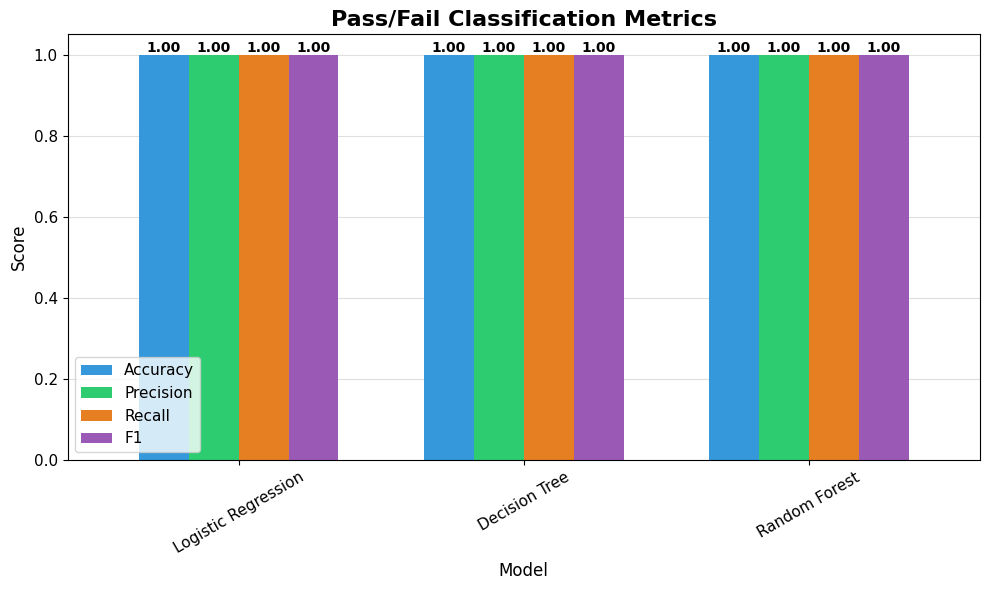

In [235]:
pass_fail_df = pd.DataFrame(classification_pass_results).T
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
fig, ax4 = plt.subplots(figsize=(10,6))
colors = ['#3498db', '#2ecc71', '#e67e22', '#9b59b6']
bars = pass_fail_df[metrics].plot(kind='bar', ax=ax4, color=colors, width=0.7)
ax4.set_title('Pass/Fail Classification Metrics', fontsize=16, fontweight='bold')
ax4.set_xlabel('Model', fontsize=12)
ax4.set_ylabel('Score', fontsize=12)
ax4.tick_params(axis='x', rotation=30, labelsize=11)
ax4.tick_params(axis='y', labelsize=11)
ax4.legend(metrics, fontsize=11)
for p in ax4.patches:
    ax4.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
ax4.grid(axis='y', alpha=0.4)
ax4.set_axisbelow(True)
plt.tight_layout()
plt.show()

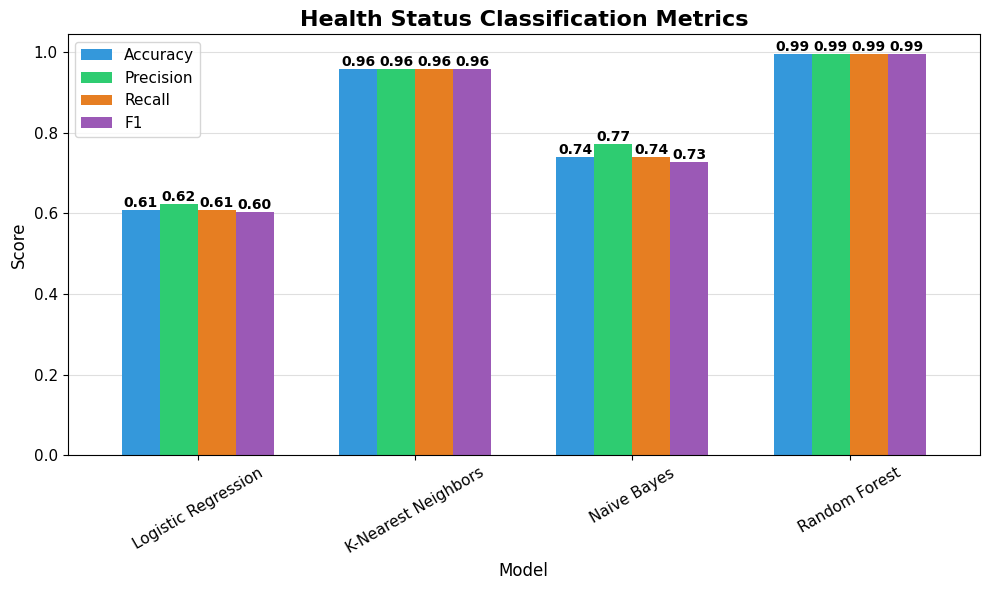

In [237]:
health_df = pd.DataFrame(classification_health_results).T
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
fig, ax5 = plt.subplots(figsize=(10,6))
colors = ['#3498db', '#2ecc71', '#e67e22', '#9b59b6']
bars = health_df[metrics].plot(kind='bar', ax=ax5, color=colors, width=0.7)
ax5.set_title('Health Status Classification Metrics', fontsize=16, fontweight='bold')
ax5.set_xlabel('Model', fontsize=12)
ax5.set_ylabel('Score', fontsize=12)
ax5.tick_params(axis='x', rotation=30, labelsize=11)
ax5.tick_params(axis='y', labelsize=11)
ax5.legend(metrics, fontsize=11)
for p in ax5.patches:
    ax5.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
ax5.grid(axis='y', alpha=0.4)
ax5.set_axisbelow(True)
plt.tight_layout()
plt.show()

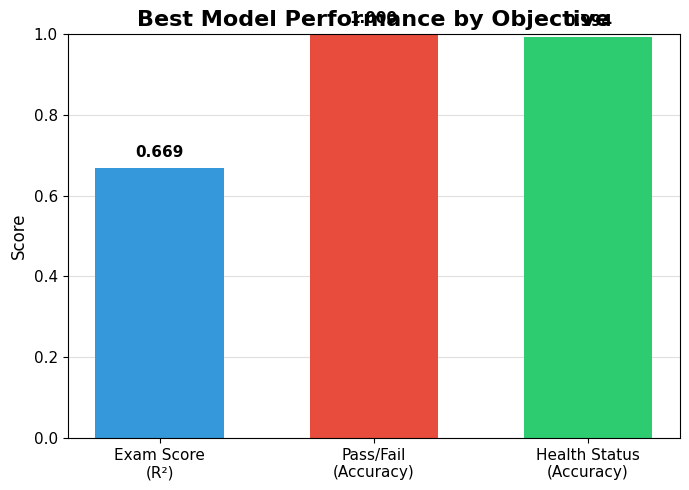

In [242]:
best_models = {
    'Exam Score\n(R²)': best_reg_model[1]['R²'],
    'Pass/Fail\n(Accuracy)': max(classification_pass_results.items(), key=lambda x: x[1]['Accuracy'])[1]['Accuracy'],
    'Health Status\n(Accuracy)': max(classification_health_results.items(), key=lambda x: x[1]['Accuracy'])[1]['Accuracy']
}
fig, ax6 = plt.subplots(figsize=(7,5))
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax6.bar(best_models.keys(), best_models.values(), color=colors, width=0.6)
ax6.set_title('Best Model Performance by Objective', fontsize=16, fontweight='bold')
ax6.set_ylabel('Score', fontsize=12)
ax6.set_ylim([0, 1])
ax6.tick_params(axis='y', labelsize=11)
ax6.tick_params(axis='x', labelsize=11)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax6.grid(axis='y', alpha=0.4)
ax6.set_axisbelow(True)
plt.tight_layout()
plt.show()

In [249]:
test_cases = [
    {
        'name': 'High Performer',
        'age': 21,
        'study_hours': 7.5,
        'class_attendance': 95.0,
        'sleep_hours': 8.0,
        'sleep_quality': 'good',
        'study_method': 'coaching',
        'facility_rating': 'high'
    },
    {
        'name': 'Average Student',
        'age': 20,
        'study_hours': 4.0,
        'class_attendance': 75.0,
        'sleep_hours': 6.5,
        'sleep_quality': 'average',
        'study_method': 'self-study',
        'facility_rating': 'medium'
    },
    {
        'name': 'Struggling Student',
        'age': 19,
        'study_hours': 1.5,
        'class_attendance': 50.0,
        'sleep_hours': 5.0,
        'sleep_quality': 'poor',
        'study_method': 'online videos',
        'facility_rating': 'low'
    },
    {
        'name': 'Balanced Approach',
        'age': 22,
        'study_hours': 5.5,
        'class_attendance': 88.0,
        'sleep_hours': 7.5,
        'sleep_quality': 'good',
        'study_method': 'mixed',
        'facility_rating': 'high'
    },
    {
        'name': 'Overworked Student',
        'age': 23,
        'study_hours': 9.0,
        'class_attendance': 92.0,
        'sleep_hours': 4.5,
        'sleep_quality': 'poor',
        'study_method': 'self-study',
        'facility_rating': 'medium'
    }
]

In [253]:
for i, test_case in enumerate(test_cases, 1):
    print(f"Test Case {i}: {test_case['name']}")
    print("Input Features:")
    print(f"Age: {test_case['age']}")
    print(f"Study Hours: {test_case['study_hours']}")
    print(f"Class Attendance: {test_case['class_attendance']}%")
    print(f"Sleep Hours: {test_case['sleep_hours']}")
    print(f"Sleep Quality: {test_case['sleep_quality']}")
    print(f"Study Method: {test_case['study_method']}")
    print(f"Facility Rating: {test_case['facility_rating']}")

    study_method_encoded = label_encoders['study_method'].transform([test_case['study_method']])[0]
    facility_rating_encoded = label_encoders['facility_rating'].transform([test_case['facility_rating']])[0]
    sleep_quality_encoded = label_encoders['sleep_quality'].transform([test_case['sleep_quality']])[0]

    X_test_exam = np.array([[
        test_case['age'],
        test_case['study_hours'],
        test_case['class_attendance'],
        test_case['sleep_hours'],
        study_method_encoded,
        facility_rating_encoded
    ]])
    X_test_exam_scaled = scaler_exam.transform(X_test_exam)
    predicted_score = rf_reg.predict(X_test_exam_scaled)[0]

    X_test_pass = np.array([[predicted_score]])
    X_test_pass_scaled = scaler_pass.transform(X_test_pass)
    pass_fail_pred = rf_clf.predict(X_test_pass_scaled)[0]
    pass_fail_proba = rf_clf.predict_proba(X_test_pass_scaled)[0]

    X_test_health = np.array([[
        test_case['age'],
        test_case['sleep_hours'],
        sleep_quality_encoded,
        test_case['study_hours']
    ]])
    X_test_health_scaled = scaler_health.transform(X_test_health)
    health_status_pred = rf_health.predict(X_test_health_scaled)[0]
    health_status = label_encoders['health_status'].inverse_transform([health_status_pred])[0]

    print("\nPredictions:")
    print(f"Exam Score: {predicted_score:.2f}/100")
    print(f"Pass/Fail: {'PASS' if pass_fail_pred == 1 else 'FAIL'} (Confidence: {pass_fail_proba[pass_fail_pred]:.2%})")
    print(f"Health Status: {health_status}")
    print("\n")

Test Case 1: High Performer
Input Features:
Age: 21
Study Hours: 7.5
Class Attendance: 95.0%
Sleep Hours: 8.0
Sleep Quality: good
Study Method: coaching
Facility Rating: high

Predictions:
Exam Score: 95.65/100
Pass/Fail: PASS (Confidence: 100.00%)
Health Status: Excellent


Test Case 2: Average Student
Input Features:
Age: 20
Study Hours: 4.0
Class Attendance: 75.0%
Sleep Hours: 6.5
Sleep Quality: average
Study Method: self-study
Facility Rating: medium

Predictions:
Exam Score: 57.17/100
Pass/Fail: PASS (Confidence: 100.00%)
Health Status: Excellent


Test Case 3: Struggling Student
Input Features:
Age: 19
Study Hours: 1.5
Class Attendance: 50.0%
Sleep Hours: 5.0
Sleep Quality: poor
Study Method: online videos
Facility Rating: low

Predictions:
Exam Score: 33.21/100
Pass/Fail: FAIL (Confidence: 100.00%)
Health Status: Fair


Test Case 4: Balanced Approach
Input Features:
Age: 22
Study Hours: 5.5
Class Attendance: 88.0%
Sleep Hours: 7.5
Sleep Quality: good
Study Method: mixed
Facility

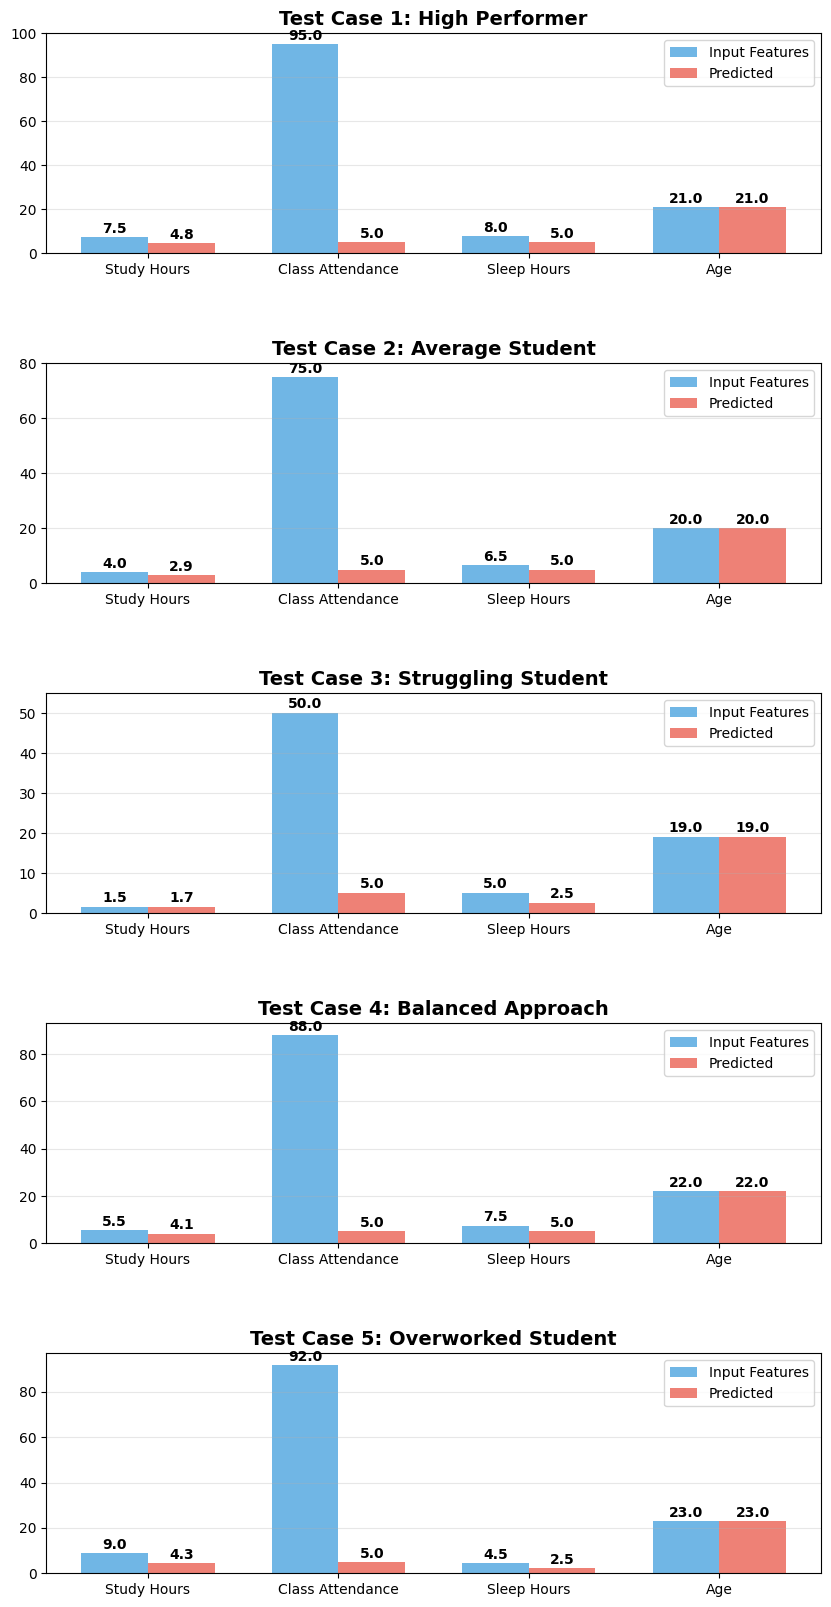

In [260]:
health_map = {'Fair': 0.5, 'good': 0.8, 'Excellent': 1.0}

fig, axs = plt.subplots(5, 1, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)

for i, test_case in enumerate(test_cases):
    # Encode categorical features
    study_method_encoded = label_encoders['study_method'].transform([test_case['study_method']])[0]
    facility_rating_encoded = label_encoders['facility_rating'].transform([test_case['facility_rating']])[0]
    sleep_quality_encoded = label_encoders['sleep_quality'].transform([test_case['sleep_quality']])[0]

    # Exam Score
    X_test_exam = np.array([[test_case['age'], test_case['study_hours'], test_case['class_attendance'],
                             test_case['sleep_hours'], study_method_encoded, facility_rating_encoded]])
    X_test_exam_scaled = scaler_exam.transform(X_test_exam)
    predicted_score = rf_reg.predict(X_test_exam_scaled)[0]

    # Pass/Fail
    X_test_pass = np.array([[predicted_score]])
    X_test_pass_scaled = scaler_pass.transform(X_test_pass)
    pred_pass = rf_clf.predict(X_test_pass_scaled)[0]
    prob_pass = rf_clf.predict_proba(X_test_pass_scaled)[0][pred_pass]

    # Health Status
    X_test_health = np.array([[test_case['age'], test_case['sleep_hours'], sleep_quality_encoded, test_case['study_hours']]])
    X_test_health_scaled = scaler_health.transform(X_test_health)
    pred_health = rf_health.predict(X_test_health_scaled)[0]
    health_status = label_encoders['health_status'].inverse_transform([pred_health])[0]

    # Numeric values for plotting
    input_values = [test_case['study_hours'], test_case['class_attendance'], test_case['sleep_hours'], test_case['age']]
    predicted_values = [predicted_score/20, prob_pass*100/20, health_map[health_status]*100/20, test_case['age']]  # scaled for comparison

    labels = ['Study Hours', 'Class Attendance', 'Sleep Hours', 'Age']
    x = np.arange(len(labels))
    width = 0.35

    bars1 = axs[i].bar(x - width/2, input_values, width, label='Input Features', color='#3498db', alpha=0.7)
    bars2 = axs[i].bar(x + width/2, predicted_values, width, label='Predicted', color='#e74c3c', alpha=0.7)

    axs[i].set_title(f"Test Case {i+1}: {test_case['name']}", fontsize=14, fontweight='bold')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
    axs[i].set_ylim(0, max(max(input_values), max(predicted_values)) + 5)
    axs[i].legend()
    axs[i].grid(axis='y', alpha=0.3)

    # Add value annotations
    for bar in bars1:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    for bar in bars2:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.show()